In [4]:
import numpy as np
import pandas as pd
import re

In [177]:
#Reading the cleaned user data (age 18-28)
user_data=pd.read_csv('Final_cleaned_members.csv')
user_data.head()

Unnamed: 0  Unnamed: 0.1                                          msno  \
0           1            10  GoFYKhcq8Q5Gjz1M5L0azHZOhcY+Za/T7fRqIGgBuYA=   
1           3            15  vUzJAyFEudsnkWwfcLIKT5mJAV+uVRTW2uajCrghFwI=   
2           6            28  ox62m0QICnrFa8/ZM5jJ5WBidWIieREUjUdCiWExLSU=   
3           7            29  95tnnY+Zq8f4jpk5SaDWcmnngD9dFe/OwxAqhss6T8k=   
4           8            30  Der2/cdVesg2+u1UZX/u11dZBM/FWtNl1TlKIK82puw=   

   city  bd  gender  registered_via  registration_init_time  expiration_date  
0    12  28    male               9                20060531         20170816  
1    13  20    male               3                20140410         20170427  
2     6  26  female               7                20140118         20170917  
3     4  25  female               3                20150624         20150701  
4    11  21  female               9                20140817         20171231

In [200]:
#Reading cleaned songs metadata (all NaN and special characters entries removed)
songs=pd.read_csv('cleaned_music_metadata.csv')
songs.head()

Unnamed: 0       0         1  \
0  +dOlHQGlsiHPbG1cMYsoFVsAi05YgsGfeEzsdS16yec=  368441  ['1609']   
1  NV9HhUzyK50tGvxb3w0PdZoaw3Ypp86XDmmMr0vgFdg=  262749   ['139']   
2  igUq5ErBzlm2Wi05YsoiyWdxd4wbHGPaFOS8kQFhoik=  228717   ['465']   
3  UfK2UdQAaYF6IJUXqSJ10FsbAF3YkvMJYcTYC2Ec5m4=  222649  ['1609']   
4  nO+tjL6/qHgNO/ui0TjeP+nSsD+aoGcT9AHU7Dtrzsc=  227327   ['880']   

                        2                                                  3  \
0  ['Marvin Gaye & Kygo']     ['Marvin Gaye', ' Odell Brown', ' David Ritz']   
1         ['John Legend']                                  ['John Stephens']   
2        ['Urban Zakapa']  ['Gwon Soonil', ' Park Yongin', ' Choi JaeMan'...   
3       ['Calvin Harris']                                  ['Calvin Harris']   
4      ['Casting Crowns']  ['Mark Hall', 'Matt Maher', 'John Mabe', 'Blak...   

                                                   4     5  
0     ['Marvin Gaye', ' Odell Brown', ' David Ritz']  -1.0  
1                                  ['John Stephens']  52.0  
2  ['Gwon Soonil', ' Park Yongin', ' Choi JaeMan'...  31.0  
3                                  ['Calvin Harris']  52.0  
4  ['Mark Hall', 'Matt Maher', 'John Mabe', 'Blak...  52.0

count    1.178320e+05
mean     2.405460e+05
std      9.126419e+04
min      4.109000e+03
25%      1.947260e+05
50%      2.292090e+05
75%      2.711610e+05
max      5.083219e+06
Name: 0, dtype: float64

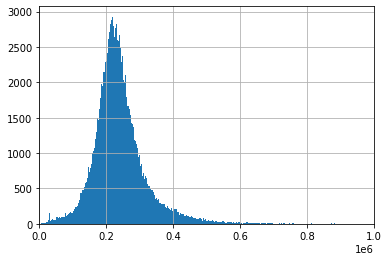

In [201]:
#Histogram on the song lengths
songlength=songs['0']
p=songlength.hist(bins='auto')
p.set_xlim([0,10**6])
songlength.describe()

In [202]:
#Triming the song list based on song length mean+-variance
idx=[]
songlength=songs['0']
for i in enumerate(songlength):
    if (i[1]<149282 or i[1]>331810):
        idx.append(i[0])
songs=songs.drop(idx)
songs.head()
songs.to_csv('cleanedlength_music_metadata.csv')

count     97040.000000
mean     231096.609676
std       41822.597708
min      149300.000000
25%      200234.000000
50%      228006.000000
75%      259317.000000
max      331788.000000
Name: 0, dtype: float64

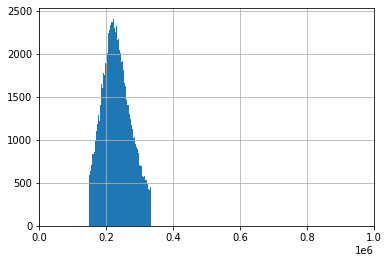

In [181]:
#Histogram on the song lengths
songlength=songs['0']
p=songlength.hist(bins='auto')
p.set_xlim([0,10**6])
songlength.describe()

In [182]:
#Reading test.csv in raw form
test=pd.read_csv('test.csv')
test.dropna()

id                                          msno  \
0              0  V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=   
1              1  V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=   
3              3  1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=   
4              4  1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=   
5              5  1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=   
...          ...                                           ...   
2556781  2556781  J6U8R16TeYWhrnl/riJeqc7scOwhoBeYz5+3O7ao1mE=   
2556782  2556782  XmA/cIkXJ8jZUfsUc4bBfJVWMMqmylnPW0WVkg/iz0s=   
2556783  2556783  k87exEzK9b71OyGFQkvMTUFW6ue+j321CsMbwpz3o/w=   
2556784  2556784  XmA/cIkXJ8jZUfsUc4bBfJVWMMqmylnPW0WVkg/iz0s=   
2556785  2556785  XmA/cIkXJ8jZUfsUc4bBfJVWMMqmylnPW0WVkg/iz0s=   

                                              song_id source_system_tab  \
0        WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=        my library   
1        y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=        my library   
3        ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=             radio   
4        MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=             radio   
5        NV3nhEcMqsawwvSNTUAt9IVAexHLOm0lDfrHyEfN5B0=             radio   
...                                               ...               ...   
2556781  J0L32tjJ+S9PtXac0SDvLe9wfyUxR7lSPGIBBt0KX+s=          discover   
2556782  DLewxl82pFT6+OgSpGYmN26IayVLtcv2eiJEJBSIWLI=          discover   
2556783  A1A04ZUa5dvkPMcPmoHkPD5apjQM3KBhVlcL/SR3S7Q=        my library   
2556784  HGROX/ydkner7ykeMTZjh5oW/b0DbHb0awQIqRNBHIc=          discover   
2556785  wJoWzZd7AL+qX9xZWZwRTzGRYg0Lxcl5Pe+9n5hZgAQ=          discover   

           source_screen_name      source_type  
0         Local playlist more    local-library  
1         Local playlist more    local-library  
3                       Radio            radio  
4                       Radio            radio  
5                       Radio            radio  
...                       ...              ...  
2556781  Online playlist more  online-playlist  
2556782  Online playlist more  online-playlist  
2556783   Local playlist more   local-playlist  
2556784  Online playlist more  online-playlist  
2556785  Online playlist more  online-playlist  

[2392626 rows x 6 columns]

In [183]:
#Removing the data cooresponding to the users that we filtered away from user data (keeping 18-28yr without NaN)
idx=[]
for i in range(test.msno.size):
    if test.msno[i] not in user_data.msno.tolist():
        idx.append(i)
test=test.drop(idx)
test.to_csv('Final_cleaned_test.csv')       

In [5]:
#Reading new test file and keeping just msno and song_id for further computation
test=pd.read_csv('Final_cleaned_test.csv')
test_cal=test.drop(['source_system_tab','source_screen_name','source_type'],axis=1)
test_cal.head()

Unnamed: 0  Unnamed: 0.1  id                                          msno  \
0           0            24  24  NMjW8qxMk/ojwFH12PXQmwEsP48/c3rLi7MWU2QHa7k=   
1           1            25  25  NMjW8qxMk/ojwFH12PXQmwEsP48/c3rLi7MWU2QHa7k=   
2           2            26  26  NMjW8qxMk/ojwFH12PXQmwEsP48/c3rLi7MWU2QHa7k=   
3           3            27  27  NMjW8qxMk/ojwFH12PXQmwEsP48/c3rLi7MWU2QHa7k=   
4           4            28  28  NMjW8qxMk/ojwFH12PXQmwEsP48/c3rLi7MWU2QHa7k=   

                                        song_id  
0  YPQayJU1Xtwo9RZ8ou798V/i6JGkrgVPrpPMyXnoBoE=  
1  PrRUipjN6anAeZNOgxqq7hyHBhd4tXIziE9A2bvprCA=  
2  UqSNAiAmq/W3WsodEfSgcfQWe5lWAvj4zyD7CXIDpIg=  
3  XCnqc4r5J4+qZLPH1zOHq5QnyR4oH0/0/mWH1dErf9Y=  
4  8J8Ybj0twL5V+fOtdNEtRo9oc2S2kLxG+AspQZLtxbw=

In [6]:
#Extracting out a list of songs sorted based on the descreasing order of popularity (no of users listening it) 
popularity=test_cal.groupby('song_id').count()
popularity.sort_values(by=['msno'], inplace=True, ascending=False)


In [48]:
#taking top 80K popular songs
popularsubset=popularity[0:70000]
popularsongs=popularsubset.index.tolist()
#len(popularsongs)
popularsubset.id.sum()

746281

In [49]:
dataframe=pd.read_csv('cleanedlength_music_metadata.csv')
dataframe.drop(['Unnamed: 0'],axis=1)

Unnamed: 0.1       0         1  \
0      NV9HhUzyK50tGvxb3w0PdZoaw3Ypp86XDmmMr0vgFdg=  262749   ['139']   
1      igUq5ErBzlm2Wi05YsoiyWdxd4wbHGPaFOS8kQFhoik=  228717   ['465']   
2      UfK2UdQAaYF6IJUXqSJ10FsbAF3YkvMJYcTYC2Ec5m4=  222649  ['1609']   
3      nO+tjL6/qHgNO/ui0TjeP+nSsD+aoGcT9AHU7Dtrzsc=  227327   ['880']   
4      ZxB4Y6OFY7oArWVqRWofM3g714CWrHbY4ohABjzGLFE=  256052  ['1609']   
...                                             ...     ...       ...   
97035  rqJDTmkXCjVbfJX1v1Q41+fVpCnTrj1krmNrxdyw7+M=  167950   ['465']   
97036  gmAdLUfMLPrO09ZV4e98xUbgkay1KvhC+vOjUKXNOJM=  192261   ['465']   
97037  bnGpjDLeYdLPPLVSaJkY/r3IYwbasruKy48iSLgTois=  174706   ['444']   
97038  9w0/At83TBWVHIMHJsLWc4XkSt6rtQWrhgPS5VkDGBw=  167481  ['1011']   
97039  zH1JEkk62Zn1a4cn89jNoNnKgPZ8jzQrlCu4+u/UC90=  235728   ['359']   

                             2  \
0              ['John Legend']   
1             ['Urban Zakapa']   
2            ['Calvin Harris']   
3           ['Casting Crowns']   
4             ['Robin Schulz']   
...                        ...   
97035        ['Dennis Wilson']   
97036         ['Grand Avenue']   
97037  ['Lee Mija/Ha Chunhwa']   
97038        ['Kenny Chesney']   
97039        ['Philip Selway']   

                                                       3  \
0                                      ['John Stephens']   
1      ['Gwon Soonil', ' Park Yongin', ' Choi JaeMan'...   
2                                      ['Calvin Harris']   
3      ['Mark Hall', 'Matt Maher', 'John Mabe', 'Blak...   
4      ['Dennis Bierbrodt', ' Guido Kramer', ' Robin ...   
...                                                  ...   
97035       ['Dan Wilson', ' C. Wilson', ' S. Kalanich']   
97036                           ['Rasmus Walter Hansen']   
97037                                     ['Go Bongsan']   
97038  ['Rodney Clawson', ' Vicky McGehee', ' David L...   
97039                                  ['Philip Selway']   

                                                       4     5  
0                                      ['John Stephens']  52.0  
1      ['Gwon Soonil', ' Park Yongin', ' Choi JaeMan'...  31.0  
2                                      ['Calvin Harris']  52.0  
3      ['Mark Hall', 'Matt Maher', 'John Mabe', 'Blak...  52.0  
4      ['Dennis Bierbrodt', ' Guido Kramer', ' Robin ...  52.0  
...                                                  ...   ...  
97035       ['Dan Wilson', ' C. Wilson', ' S. Kalanich']  52.0  
97036                           ['Rasmus Walter Hansen']  52.0  
97037                                     ['Lee Yongil']  31.0  
97038  ['Rodney Clawson', ' Vicky McGehee', ' David L...  52.0  
97039                                  ['Philip Selway']  52.0  

[97040 rows x 7 columns]

In [ ]:
idx=[]
for i in range(dataframe['Unnamed: 0'].size):
    if dataframe['Unnamed: 0'][i] not in popularsongs:
        idx.append(i)
songs=dataframe.drop(idx)

In [ ]:
#No of unique artists in the 'popular' songs 
artistlist=songs['2']
b=[]
for i,j in enumerate(artistlist):
    x=j[1:-1].split(', ')
    b.insert(i,x)
blist = [item for sublist in b for item in sublist]
bist=np.unique(np.array(blist))
print(len(bist))

In [ ]:
#Unique composers in the 'popular' songs
artistlist=songs['3']
b=[]
for i,j in enumerate(artistlist):
    x=j[1:-1].split(', ')
    b.insert(i,x)
blist = [item for sublist in b for item in sublist]
bist=np.unique(np.array(blist))
print(len(bist))

In [ ]:
songs.head()

In [ ]:
songs.rename(columns={'Unnamed: 0.1':'song_id','0':'song_length','1':'genre_ids', '2':'artist_name' ,'3':'composer' ,'4':'lyricist','5':'language'}, inplace=True)
songs.head()

In [ ]:
songs.to_csv('Final_cleaned_song_metadata.csv')

In [ ]:
#Removing the songs from test data that we filtered away
idx=[]
for i in range(test.msno.size):
    if test.msno[i] not in songs.msno.tolist():
        idx.append(i)
test=test.drop(idx)
test.to_csv('Final_cleaned_test.csv')

In [ ]:
#Cleaning train data using the final userdata and songs data to make sure that 
#these have just those songs and users which we final continued with
train=pd.read_csv('train.csv')
train.dropna()
idx=[]
for i in range(train.msno.size):
    if train.msno[i] not in user_data.msno.tolist():
        idx.append(i)
train=train.drop(idx)
idx=[]
for i in range(train.msno.size):
    if train.msno[i] not in songs.msno.tolist():
        idx.append(i)
train=train.drop(idx)
train.to_csv('Final_cleaned_train.csv')